In [281]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder,MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [162]:
df = pd.read_csv(r'C:\Users\91809\Downloads\Data Science\Python\Python\Solved_by_own\NP Churn Model\Churn_Data.csv')
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [163]:
df.drop(columns='customerID',inplace=True)

In [164]:
for column in df:
    if df[column].dtypes == "object":
        print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [165]:
sorted(df.TotalCharges.unique())

[' ',
 '100.2',
 '100.25',
 '100.35',
 '100.4',
 '100.8',
 '100.9',
 '1001.2',
 '1001.5',
 '1003.05',
 '1004.35',
 '1004.5',
 '1004.75',
 '1005.7',
 '1006.9',
 '1007.8',
 '1007.9',
 '1008.55',
 '1008.7',
 '1009.25',
 '101.1',
 '101.45',
 '101.65',
 '101.9',
 '1010',
 '1011.05',
 '1011.5',
 '1011.8',
 '1012.4',
 '1013.05',
 '1013.2',
 '1013.35',
 '1013.6',
 '1014.25',
 '1016.7',
 '1017.35',
 '102.45',
 '102.5',
 '102.75',
 '1020.2',
 '1020.75',
 '1021.55',
 '1021.75',
 '1021.8',
 '1022.5',
 '1022.6',
 '1022.95',
 '1023.75',
 '1023.85',
 '1023.9',
 '1023.95',
 '1024',
 '1024.65',
 '1024.7',
 '1025.05',
 '1025.15',
 '1025.95',
 '1026.35',
 '1027.25',
 '1028.75',
 '1028.9',
 '1029.35',
 '1029.75',
 '1029.8',
 '103.7',
 '1031.1',
 '1031.4',
 '1031.7',
 '1032',
 '1032.05',
 '1033',
 '1033.9',
 '1033.95',
 '1035.5',
 '1035.7',
 '1036',
 '1036.75',
 '1037.75',
 '1039.45',
 '104.2',
 '104.3',
 '1041.8',
 '1042.65',
 '1043.3',
 '1043.35',
 '1043.4',
 '1043.8',
 '1045.25',
 '1046.1',
 '1046.2',
 

In [166]:
df.drop(df[df['TotalCharges']==' '].index,inplace=True)

In [167]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [169]:
for column in df:
    if df[column].dtypes == "object":
        print(f'{column} : {df[column].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [170]:
df['gender'].replace({'Female':1,'Male':0},inplace=True)
df.replace('No phone service','No',inplace=True)
df.replace('No internet service','No',inplace=True)

In [171]:
for column in df:
    if df[column].dtypes == "object":
        print(f'{column} : {df[column].unique()}')

Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [172]:
yes_no_cols = [
    'Partner' ,
'Dependents' ,
'PhoneService' ,
'MultipleLines' ,
'OnlineSecurity' ,
'OnlineBackup' ,
'DeviceProtection' ,
'TechSupport' ,
'StreamingTV' ,
'StreamingMovies' ,
'PaperlessBilling'
]
for x in yes_no_cols:
    df[x].replace({'Yes':1,'No':0},inplace=True)
    print(df[x].unique()) 

[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]
[0 1]
[0 1]
[0 1]
[0 1]
[1 0]


In [173]:
for column in df:
    if df[column].dtypes == "object":
        print(f'{column} : {df[column].unique()}')

InternetService : ['DSL' 'Fiber optic' 'No']
Contract : ['Month-to-month' 'One year' 'Two year']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [176]:
df = pd.get_dummies(data=df,columns=['InternetService','Contract','PaymentMethod'],drop_first=True)

In [177]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,29.85,29.85,No,0,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,No,0,0,1,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,53.85,108.15,Yes,0,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,No,0,0,1,0,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,70.70,151.65,Yes,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,84.80,1990.50,No,0,0,1,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,103.20,7362.90,No,1,0,1,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,29.60,346.45,No,0,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,74.40,306.60,Yes,1,0,0,0,0,0,1


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   MultipleLines                          7032 non-null   int64  
 7   OnlineSecurity                         7032 non-null   int64  
 8   OnlineBackup                           7032 non-null   int64  
 9   DeviceProtection                       7032 non-null   int64  
 10  TechSupport                            7032 non-null   int64  
 11  Stre

In [181]:
X = df.drop('Churn',axis=1)
y = df['Churn']

In [184]:
le = LabelEncoder()
y = le.fit_transform(y)

In [190]:
X.shape

(7032, 23)

In [227]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [228]:
X_train.shape,X_test.shape

((5625, 23), (1407, 23))

In [229]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [206]:
X_train.shape, X_test.shape

((5625, 23), (1407, 23))

In [245]:
RFC = RandomForestClassifier()

In [209]:

RFC.fit(X_train,y_train)
y_pred = RFC.predict(X_test)
y_pred_proba = RFC.predict_proba(X_test)[::1]

In [211]:
print(metrics.accuracy_score(y_test,y_pred))

0.7768301350390903


In [272]:
param_grid = {
    'max_depth':[2,3,4,5,6,7,8,9,10,11,12,13,14,15,None],
    'bootstrap':[True,False],
    'n_estimators':np.linspace(50,500,10).astype(int),
    'class_weight':["Balanced","balanced_subsample"]
}
param_grid1 = {
    'class_weight':["balanced","balanced_subsample"]
}
param_grid1

{'class_weight': ['balanced', 'balanced_subsample']}

In [273]:
import time
start_time = time.time()
grid = GridSearchCV(RFC,param_grid=param_grid1,cv=5,n_jobs=-1)
grid.fit(X_train,y_train)
print('Total Time Taken: ',time.time() - start_time)

Total Time Taken:  1.5313310623168945


In [274]:
grid.best_params_

{'class_weight': 'balanced'}

In [288]:
RFC_HPT = RandomForestClassifier(max_depth=8,bootstrap=False,n_estimators=200,class_weight="balanced")
cv = cross_val_score(RFC_HPT,X_train,y_train,n_jobs=-1,cv=5,scoring='accuracy')
print(np.round(cv.mean(),4)*100)

76.75999999999999


In [289]:
RFC_HPT.fit(X_train,y_train)
y_pred = RFC_HPT.predict(X_test)
y_pred_proba = RFC_HPT.predict_proba(X_test)[::,1]

In [292]:
print(metrics.accuracy_score(y_test,y_pred))

0.7540867093105899


In [293]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1023
           1       0.53      0.78      0.63       384

    accuracy                           0.75      1407
   macro avg       0.72      0.76      0.72      1407
weighted avg       0.80      0.75      0.77      1407



In [294]:
metrics.confusion_matrix(y_test,y_pred)

array([[763, 260],
       [ 86, 298]], dtype=int64)

Text(0.5, 1.0, 'ROC AUC Score: 82.97%')

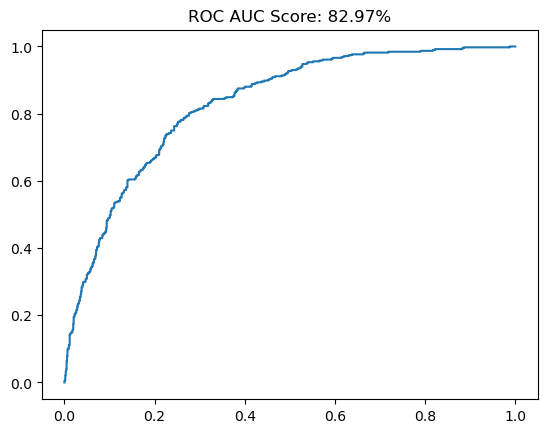

In [295]:
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
plt.plot(fpr,tpr)
plt.title("ROC AUC Score: "+str(np.round(metrics.roc_auc_score(y_test,y_pred_proba),4)*100)+"%")

In [296]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier()
GBC.fit(X_train,y_train)
y_pred_GBC = GBC.predict(X_test)
y_pred_proba_GBC = GBC.predict_proba(X_test)[::,1]

In [298]:
print(metrics.accuracy_score(y_test,y_pred_GBC))
print(metrics.confusion_matrix(y_test,y_pred_GBC))

0.7903340440653873
[[921 102]
 [193 191]]


In [300]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train,y_train)
y_pred_XGBC = xgbc.predict(X_test)
y_pred_proba_XGBC = xgbc.predict_proba(X_test)[::,1]

In [301]:
print(metrics.accuracy_score(y_test,y_pred_XGBC))
print(metrics.confusion_matrix(y_test,y_pred_XGBC))

0.7746979388770433
[[912 111]
 [206 178]]


In [312]:
xgbc.feature_importances_

array([0.00903227, 0.01254048, 0.00888304, 0.01088079, 0.03471759,
       0.02289923, 0.01444951, 0.01347359, 0.01169157, 0.01060201,
       0.01197594, 0.01130336, 0.02332626, 0.01149352, 0.01078053,
       0.01235764, 0.4640083 , 0.10167076, 0.0629293 , 0.10874713,
       0.01068515, 0.01423812, 0.00731401], dtype=float32)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

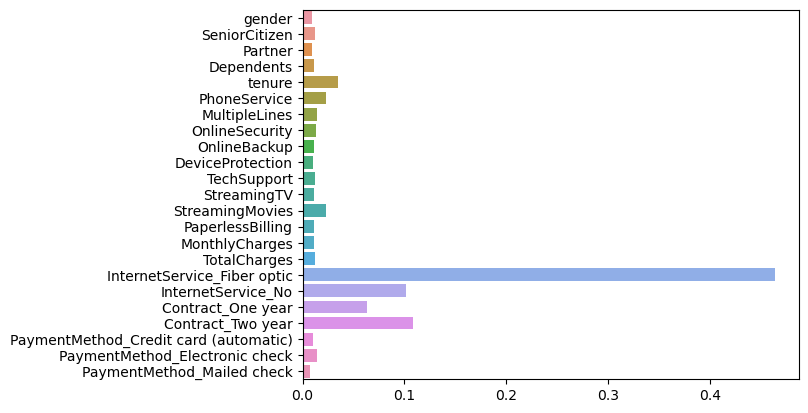

In [317]:
sns.barplot(xgbc.feature_importances_,X.columns)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

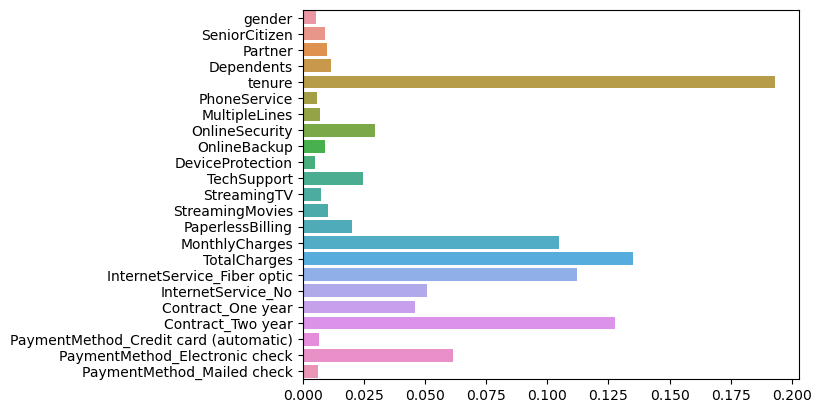

In [318]:
sns.barplot(RFC_HPT.feature_importances_,X.columns)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

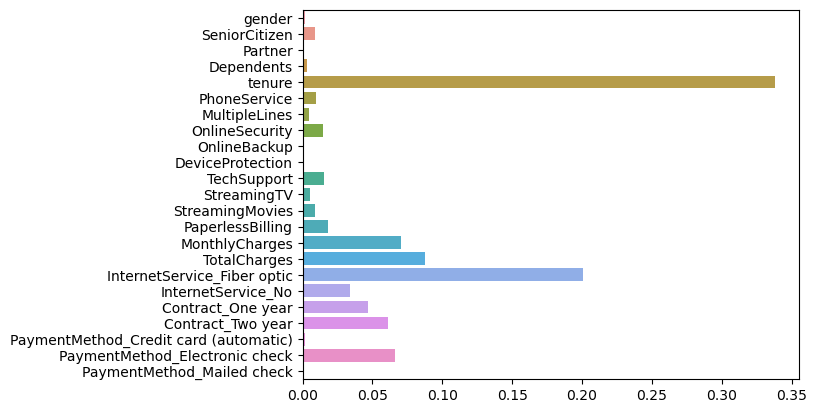

In [319]:
sns.barplot(GBC.feature_importances_,X.columns)